In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/aluminum_coldRoll_train.csv')
df["contourDefNdx"] = df["contourDefNdx"].astype("category")
target = "y_passXtremeDurability"

In [3]:
print("Columns:", list(df.columns))
print(df.head())

Columns: ['ID', 'alloy', 'cutTemp', 'rollTemp', 'firstPassRollPressure', 'secondPassRollPressure', 'topEdgeMicroChipping', 'blockSource', 'machineRestart', 'contourDefNdx', 'clearPassNdx', 'y_passXtremeDurability']
       ID   alloy cutTemp rollTemp  firstPassRollPressure  \
0   90465    5052    high      low                    425   
1   65272  2024-X     med      low                    550   
2  137228    7055     med     high                    475   
3  105777  2024-X    high      low                    500   
4   35702    6061    high      med                    575   

   secondPassRollPressure topEdgeMicroChipping       blockSource  \
0                     400                   no      MasterAlloys   
1                     375                   no      MasterAlloys   
2                     325                   no      MasterAlloys   
3                     400                  yes      MasterAlloys   
4                     325                   no  Argon-Industries   

  machine

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144000 entries, 0 to 143999
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   ID                      144000 non-null  int64   
 1   alloy                   144000 non-null  object  
 2   cutTemp                 144000 non-null  object  
 3   rollTemp                144000 non-null  object  
 4   firstPassRollPressure   144000 non-null  int64   
 5   secondPassRollPressure  144000 non-null  int64   
 6   topEdgeMicroChipping    144000 non-null  object  
 7   blockSource             144000 non-null  object  
 8   machineRestart          144000 non-null  object  
 9   contourDefNdx           144000 non-null  category
 10  clearPassNdx            144000 non-null  float64 
 11  y_passXtremeDurability  144000 non-null  int64   
dtypes: category(1), float64(1), int64(4), object(6)
memory usage: 12.2+ MB


In [5]:
numeric_cols = [
'firstPassRollPressure',
 'secondPassRollPressure',
 'clearPassNdx'
 ]

In [6]:
categorical_cols = [
    "alloy",
    "cutTemp",
    "rollTemp",
    "topEdgeMicroChipping",
    "blockSource",
    "machineRestart",
     'contourDefNdx',
]

In [7]:
target_col = "y_passXtremeDurability"
print(df[target_col].value_counts())

y_passXtremeDurability
0    78747
1    65253
Name: count, dtype: int64


In [8]:
df["label_str"] = df[target].map({0: "Fail", 1: "Pass"})
label_for_hue = "label_str"   

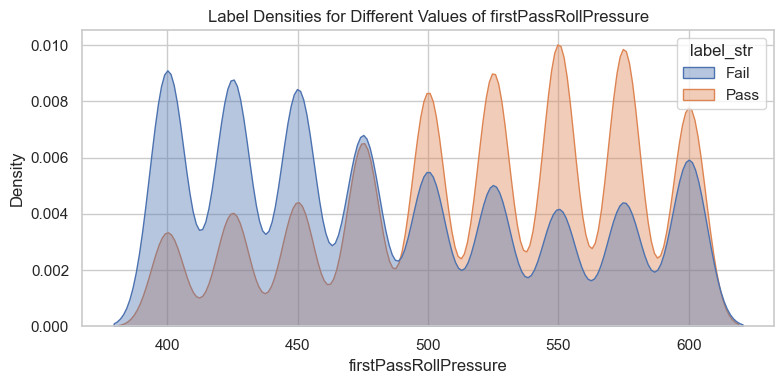

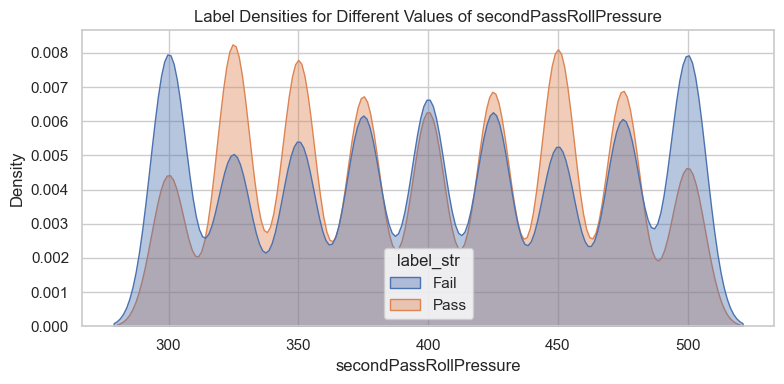

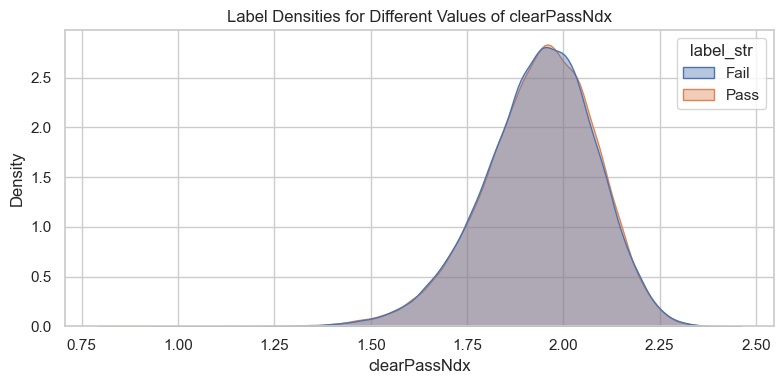

In [9]:
sns.set(style="whitegrid")

for col in numeric_cols:
    plt.figure(figsize=(8, 4))

    sns.kdeplot(
        data=df,
        x=col,
        hue=label_for_hue,
        common_norm=False, 
        fill=True,
        alpha=0.4,
    )

    plt.title(f"Label Densities for Different Values of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.savefig(f'figs/{col}.pdf')


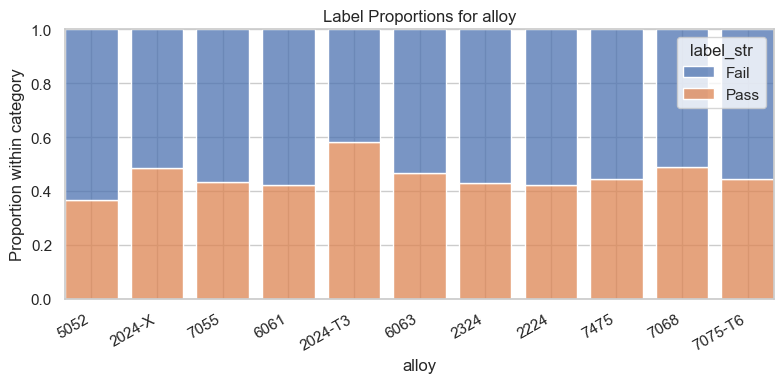

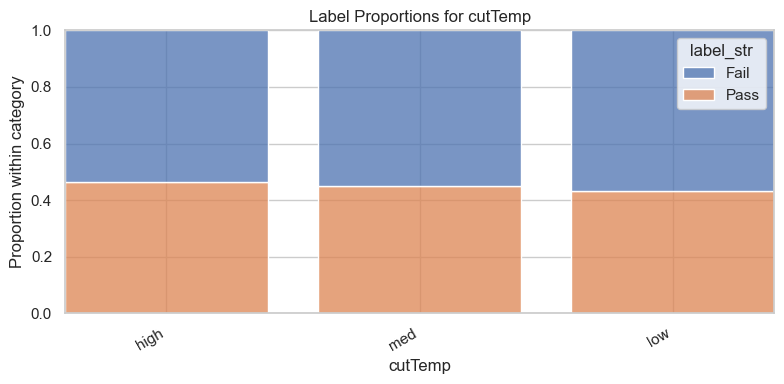

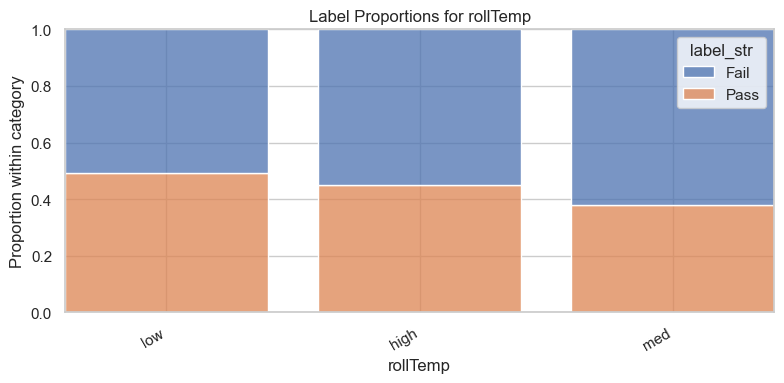

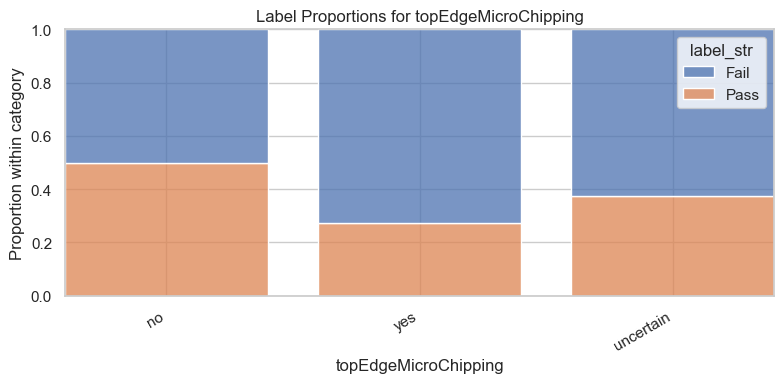

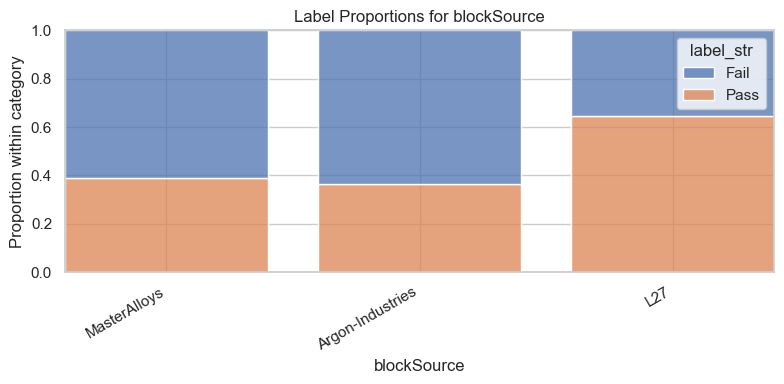

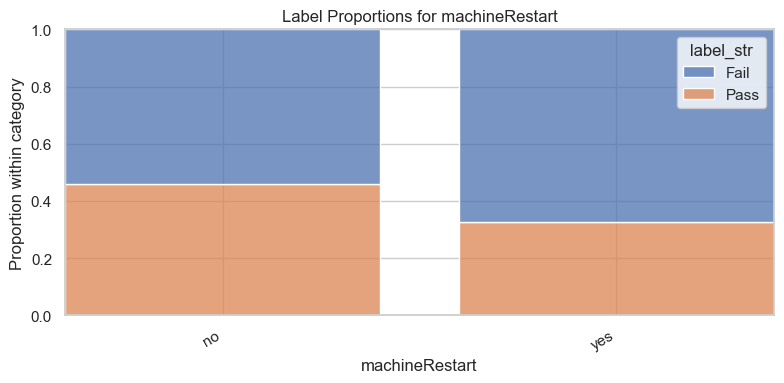

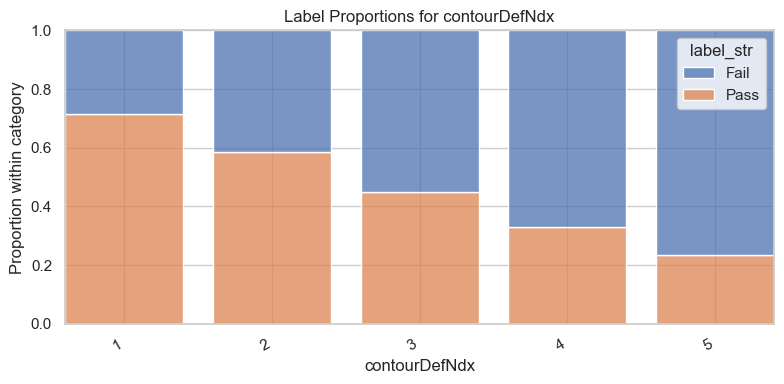

In [10]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))

    # stacked/normalized bar-style plot: proportion by label in each category
    sns.histplot(
        data=df,
        x=col,
        hue=label_for_hue,
        multiple="fill",     # makes bars sum to 1 per category
        stat="probability",
        shrink=0.8,
    )

    plt.title(f"Label Proportions for {col}")
    plt.xlabel(col)
    plt.ylabel("Proportion within category")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.savefig(f'figs/{col}.pdf')